This practical examination is a garden monitoring project using computer vision. The goal of this project is to perform garden monitoring using a set of garden images.

A set of steps for classification have been followed
Images are changed into grayscale
For each image, generate its feature descriptor while using SIFT and ORB
Perform k-means clustering on the feature array to obtain the centers of the centroid.
Split the dataset into train and test sets at an 80:20 ratio respectively.
Apply the Naive Bayes for each threshold needed for the SIFT and ORB until you obtain a good classification.
Evaluate the classifications using accuracy, precision, recall, F1

In [32]:
# importing necessary libraries
import cv2
import PIL
import glob
import time
import PIL.Image
import numpy as np
import seaborn as sns
from skimage import io
from sklearn.svm import SVC
from skimage import filters
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
# reading cropped images from matooke, maize and cassava
import pathlib
data = pathlib.Path('E:/python/Computer vision exam/resized_crop_images/matooke') 
matooke_images = list(data.glob('*.jpg'))
data = pathlib.Path('E:/python/Computer vision exam/resized_crop_images/cassava') 
cassava_images = list(data.glob('*.jpg'))
data = pathlib.Path('E:/python/Computer vision exam/resized_crop_images/maize') 
maize_images = list(data.glob('*.jpg'))
# print(len(known_images))

In [34]:
# using SIFT to extract features
img = cv2.imread(str(matooke_images[0]))
sift = cv2.SIFT_create()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

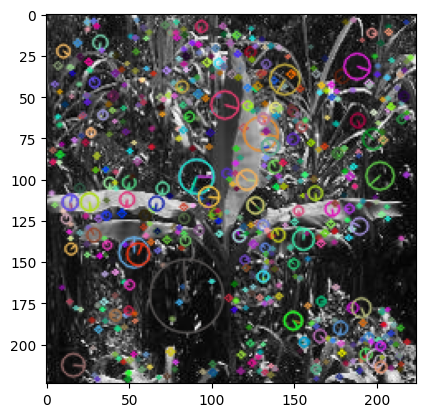

In [4]:
# Marking the keypoint on the image using circles
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)
plt.show()

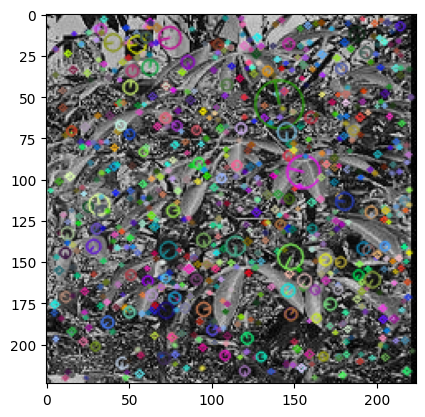

In [5]:
# using SIFT to extract features for cassava
img = cv2.imread(str(cassava_images[0]))
sift = cv2.SIFT_create()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)
 
# Marking the keypoint on the image using circles
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)
plt.show()

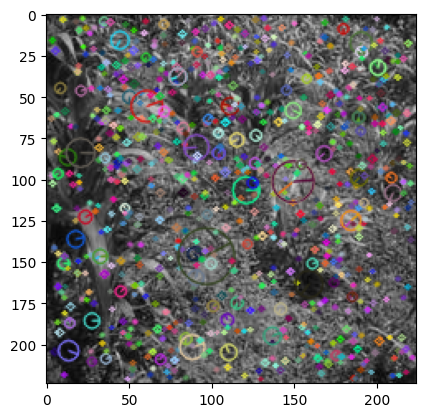

In [6]:
# using SIFT to extract features for maize
img = cv2.imread(str(maize_images[0]))
sift = cv2.SIFT_create()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)
 
# Marking the keypoint on the image using circles
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)
plt.show()

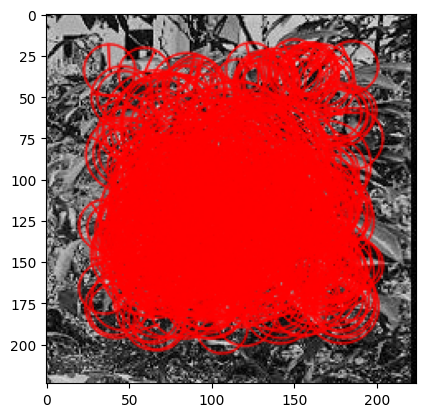

In [7]:
# Load the image
image = cv2.imread(str(cassava_images[0]), cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(image_with_keypoints)
plt.show()

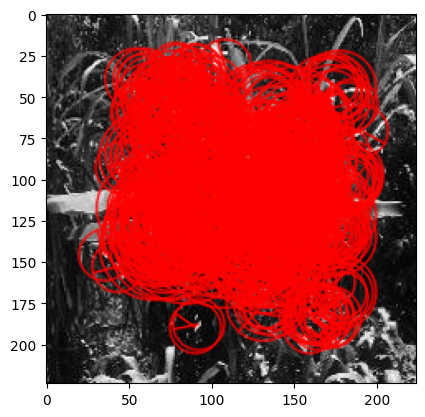

In [8]:
# Load the image
image = cv2.imread(str(matooke_images[0]), cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(image_with_keypoints)
plt.show()

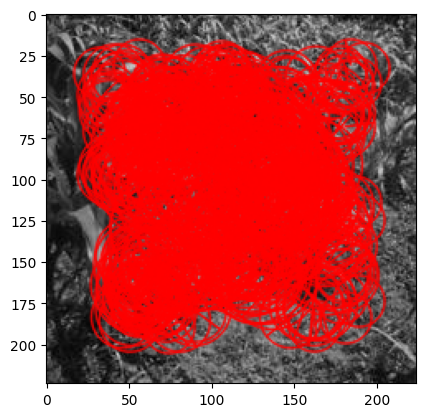

In [9]:
# Load the image
image = cv2.imread(str(maize_images[0]), cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(image_with_keypoints)
plt.show()

## Scale-invariant feature transform (SIFT)

In [10]:
def get_k_shift_thresh(thresh):
    def CalcFeatures(img, th):
        sift = cv2.SIFT_create(th)
        kp, des = sift.detectAndCompute(img, None)
        return des

    features = []
    for file in matooke_images:
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in cassava_images:
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in maize_images:
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    features = np.concatenate(features, axis=0)

    return features

In [11]:
# getting the features per threshold
features_per_threshold = {}
for i in range(10,26,10):
  features_per_threshold[i] = get_k_shift_thresh(i)

**Method structure**
Combining all the above steps into one main algorithim

In [12]:
def sift_naive_classifier(thresh):
    t0 = time.time()

    def CalcFeatures(img, th):
        sift = cv2.SIFT_create(th)
        kp, des = sift.detectAndCompute(img, None)
        return des

    # Extract features using SIFT
    features = []
    for file in matooke_images:
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in cassava_images:
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in maize_images:
        img = cv2.imread(str(file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            features.append(img_des)
    features = np.vstack(features)

    # K-Means clustering
    k = 150
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

    # Bag of Features
    def bag_of_features(features, centres, k=500):
        vec = np.zeros((1, k))
        for i in range(features.shape[0]):
            feat = features[i]
            diff = np.tile(feat, (k, 1)) - centres
            dist = pow(((pow(diff, 2)).sum(axis=1)), 0.5)
            idx_dist = dist.argsort()
            idx = idx_dist[0]
            vec[0][idx] += 1
        return vec

    labels = []
    vec = []
    for file in matooke_images:
        img = cv2.imread(str(file))
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(0)
    for file in cassava_images:
        img = cv2.imread(str(file))
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(1)
    for file in maize_images:
        img = cv2.imread(str(file))
        img_des = CalcFeatures(img, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(2)
    vec = np.vstack(vec)

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)

    # Training and evaluating the Naive Bayes classifier
    naive_nayes = GaussianNB()
    naive_nayes.fit(X_train, y_train)
    preds_naive = naive_nayes.predict(X_test)
    accuracy_bayes = accuracy_score(y_test, preds_naive)
    conf_matrix_naive = confusion_matrix(y_test, preds_naive)

    t1 = time.time()

    return accuracy_bayes * 100, conf_matrix_naive, (t1 - t0)


naive_accuracy = {}
conf_matrix_lst_bayes = {}
timer = []

for i in range(5, 26, 5):
    print('\nCalculating for a threshold of {}'.format(i))
    data = sift_naive_classifier(i)
    naive_accuracy[i] = data[0]
    conf_matrix_lst_bayes[i] = data[1]
    timer.append(data[2])
    print('\nGaussian Naive Bayes\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0], data[2], data[1]))


Calculating for a threshold of 5

Gaussian Naive Bayes
Accuracy = 20.0
Time taken = 2.806779384613037 sec
Confusion matrix :
[[0 0 2]
 [6 2 0]
 [1 3 1]]

Calculating for a threshold of 10

Gaussian Naive Bayes
Accuracy = 60.0
Time taken = 2.9119319915771484 sec
Confusion matrix :
[[2 1 0]
 [2 3 1]
 [2 0 4]]

Calculating for a threshold of 15

Gaussian Naive Bayes
Accuracy = 66.66666666666666
Time taken = 3.375317335128784 sec
Confusion matrix :
[[0 0 1]
 [0 6 3]
 [0 1 4]]

Calculating for a threshold of 20

Gaussian Naive Bayes
Accuracy = 40.0
Time taken = 3.3346641063690186 sec
Confusion matrix :
[[1 0 2]
 [2 2 3]
 [1 1 3]]

Calculating for a threshold of 25

Gaussian Naive Bayes
Accuracy = 73.33333333333333
Time taken = 3.390427827835083 sec
Confusion matrix :
[[1 1 1]
 [1 1 0]
 [0 1 9]]


In [13]:
sum(naive_accuracy.values())/len(naive_accuracy.values())

52.0

In [14]:
conf_matrix_lst_bayes

{5: array([[0, 0, 2],
        [6, 2, 0],
        [1, 3, 1]], dtype=int64),
 10: array([[2, 1, 0],
        [2, 3, 1],
        [2, 0, 4]], dtype=int64),
 15: array([[0, 0, 1],
        [0, 6, 3],
        [0, 1, 4]], dtype=int64),
 20: array([[1, 0, 2],
        [2, 2, 3],
        [1, 1, 3]], dtype=int64),
 25: array([[1, 1, 1],
        [1, 1, 0],
        [0, 1, 9]], dtype=int64)}

## Oriented FAST and rotated BRIEF

In [15]:
def get_k_orb_thresh(thresh):
    def CalcFeatures(image, th):
        orb = cv2.ORB_create(th)
        keypoints, descriptors = orb.detectAndCompute(image, None)
        return descriptors

    features = []
    for file in matooke_images:
        image = cv2.imread(str(file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in cassava_images:
        image = cv2.imread(str(file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in maize_images:
        image = cv2.imread(str(file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            features.append(img_des)
    features = np.concatenate(features, axis=0)

    return features

In [16]:
# getting the features per threshold
features_per_threshold = {}
for i in range(10,26,10):
  features_per_threshold[i] = get_k_shift_thresh(i)

In [17]:
def orb_naive_classifier(thresh):
    t0 = time.time()

    def CalcFeatures(image, th):
        orb = cv2.ORB_create(th)
        keypoints, descriptors = orb.detectAndCompute(image, None)
        return descriptors

    # Extract features using SIFT
    features = []
    for file in matooke_images:
        image = cv2.imread(str(file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in cassava_images:
        image = cv2.imread(str(file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            features.append(img_des)
    for file in maize_images:
        image = cv2.imread(str(file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            features.append(img_des)
    features = np.vstack(features)
    features = features.astype(np.float32)

    # K-Means clustering
    k = 150
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

    # Bag of Features
    def bag_of_features(features, centres, k=500):
        vec = np.zeros((1, k))
        for i in range(features.shape[0]):
            feat = features[i]
            diff = np.tile(feat, (k, 1)) - centres
            dist = pow(((pow(diff, 2)).sum(axis=1)), 0.5)
            idx_dist = dist.argsort()
            idx = idx_dist[0]
            vec[0][idx] += 1
        return vec

    labels = []
    vec = []
    for file in matooke_images:
        image = cv2.imread(str(file))
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(0)
    for file in cassava_images:
        image = cv2.imread(str(file))
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(1)
    for file in maize_images:
        image = cv2.imread(str(file))
        img_des = CalcFeatures(image, thresh)
        if img_des is not None:
            img_vec = bag_of_features(img_des, centres, k)
            vec.append(img_vec)
            labels.append(2)
    vec = np.vstack(vec)

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)

    # Training and evaluating the Naive Bayes classifier
    naive_nayes = GaussianNB()
    naive_nayes.fit(X_train, y_train)
    preds_naiveorb = naive_nayes.predict(X_test)
    accuracy_bayesorb = accuracy_score(y_test, preds_naiveorb)
    conf_matrix_naive = confusion_matrix(y_test, preds_naiveorb)

    t1 = time.time()

    return accuracy_bayesorb * 100, conf_matrix_naive, (t1 - t0)


naive_accuracyorb = {}
conf_matrix_lst_bayesorb = {}
timer = []

for i in range(5, 26, 5):
    print('\nCalculating for a threshold of {}'.format(i))
    data = orb_naive_classifier(i)
    naive_accuracyorb[i] = data[0]
    conf_matrix_lst_bayesorb[i] = data[1]
    timer.append(data[2])
    print('\nGaussian Naive Bayes\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0], data[2], data[1]))


Calculating for a threshold of 5

Gaussian Naive Bayes
Accuracy = 33.33333333333333
Time taken = 0.8803853988647461 sec
Confusion matrix :
[[1 0 0]
 [2 3 3]
 [0 5 1]]

Calculating for a threshold of 10

Gaussian Naive Bayes
Accuracy = 26.666666666666668
Time taken = 0.8748183250427246 sec
Confusion matrix :
[[0 1 0]
 [1 3 3]
 [1 5 1]]

Calculating for a threshold of 15

Gaussian Naive Bayes
Accuracy = 33.33333333333333
Time taken = 0.8691360950469971 sec
Confusion matrix :
[[0 1 3]
 [1 4 2]
 [0 3 1]]

Calculating for a threshold of 20

Gaussian Naive Bayes
Accuracy = 53.333333333333336
Time taken = 0.9022250175476074 sec
Confusion matrix :
[[0 2 0]
 [0 2 4]
 [0 1 6]]

Calculating for a threshold of 25

Gaussian Naive Bayes
Accuracy = 53.333333333333336
Time taken = 0.9551217555999756 sec
Confusion matrix :
[[2 1 0]
 [0 0 4]
 [1 1 6]]


In [18]:
sum(naive_accuracyorb.values())/len(naive_accuracyorb.values())

40.0

In [19]:
conf_matrix_lst_bayesorb

{5: array([[1, 0, 0],
        [2, 3, 3],
        [0, 5, 1]], dtype=int64),
 10: array([[0, 1, 0],
        [1, 3, 3],
        [1, 5, 1]], dtype=int64),
 15: array([[0, 1, 3],
        [1, 4, 2],
        [0, 3, 1]], dtype=int64),
 20: array([[0, 2, 0],
        [0, 2, 4],
        [0, 1, 6]], dtype=int64),
 25: array([[2, 1, 0],
        [0, 0, 4],
        [1, 1, 6]], dtype=int64)}

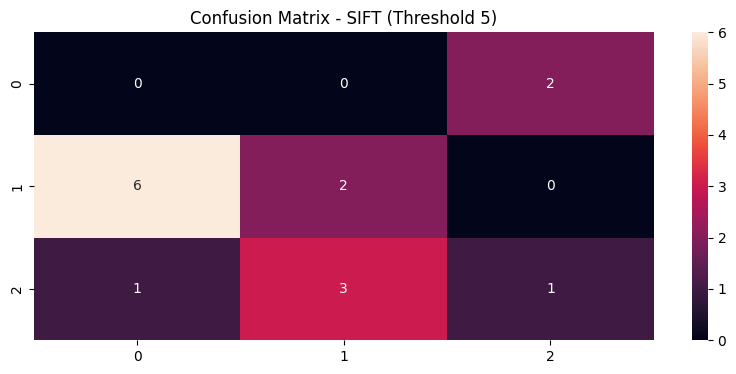

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayes[5], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - SIFT (Threshold 5)')
plt.show()

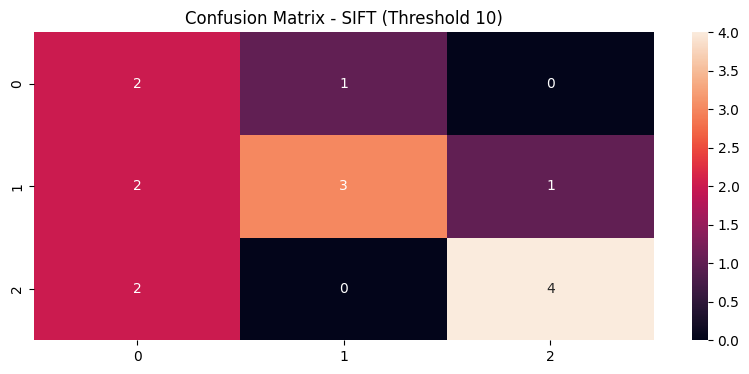

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayes[10], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - SIFT (Threshold 10)')
plt.show()

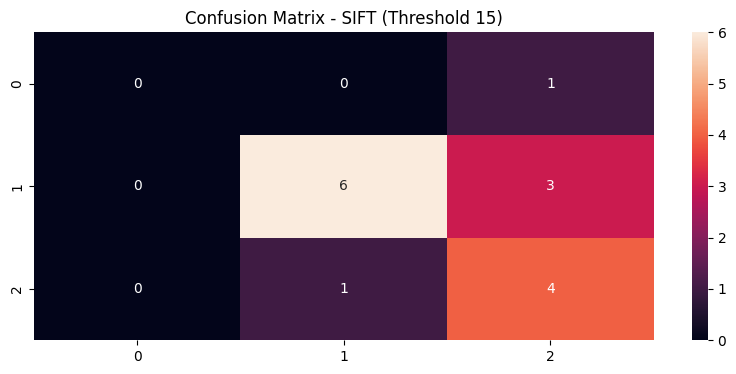

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayes[15], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - SIFT (Threshold 15)')
plt.show()

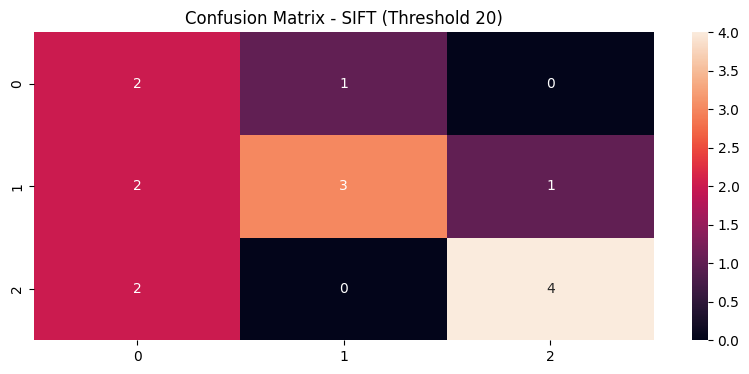

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayes[10], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - SIFT (Threshold 20)')
plt.show()

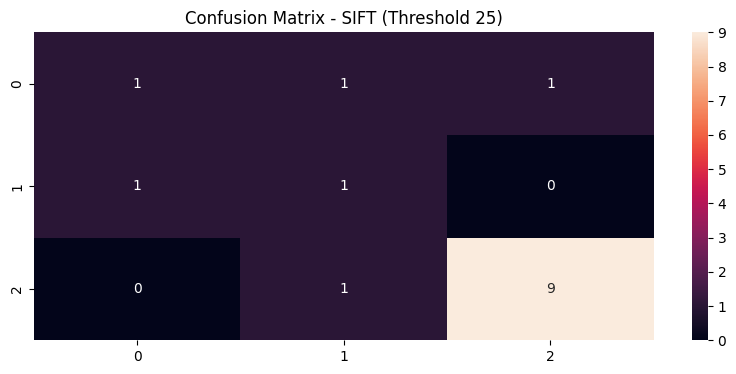

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayes[25], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - SIFT (Threshold 25)')
plt.show()

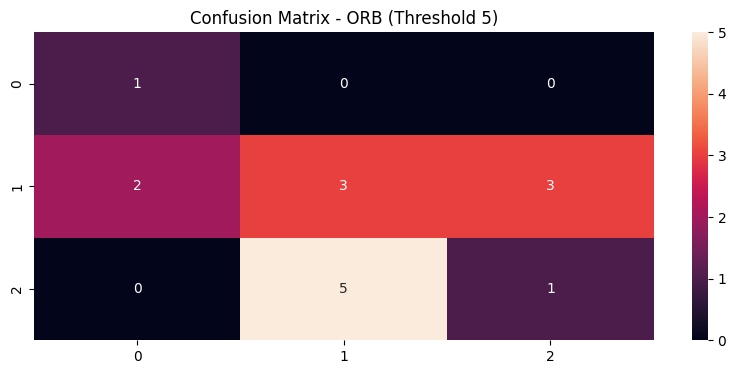

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayesorb[5], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - ORB (Threshold 5)')
plt.show()

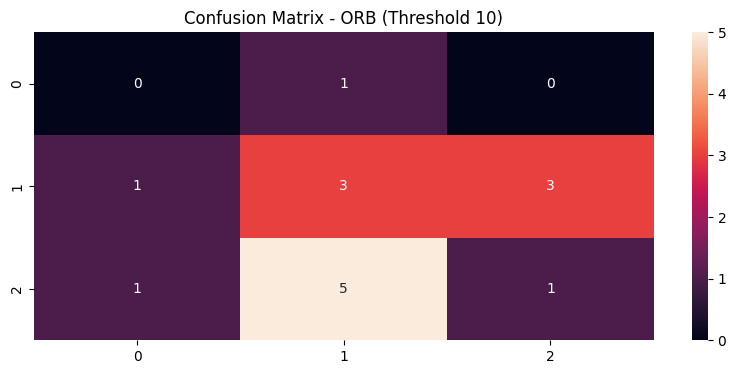

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayesorb[10], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - ORB (Threshold 10)')
plt.show()

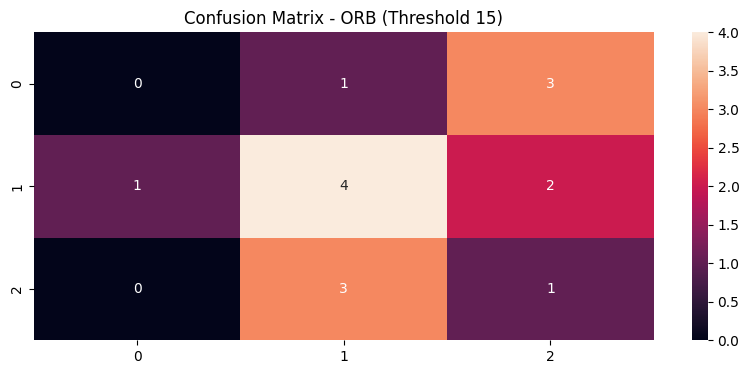

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayesorb[15], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - ORB (Threshold 15)')
plt.show()

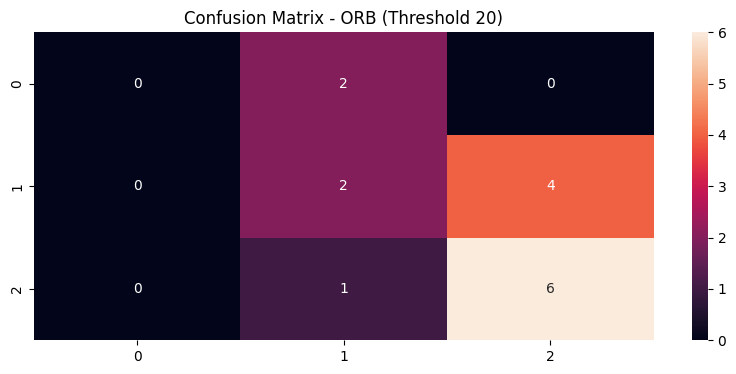

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayesorb[20], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - ORB (Threshold 20)')
plt.show()

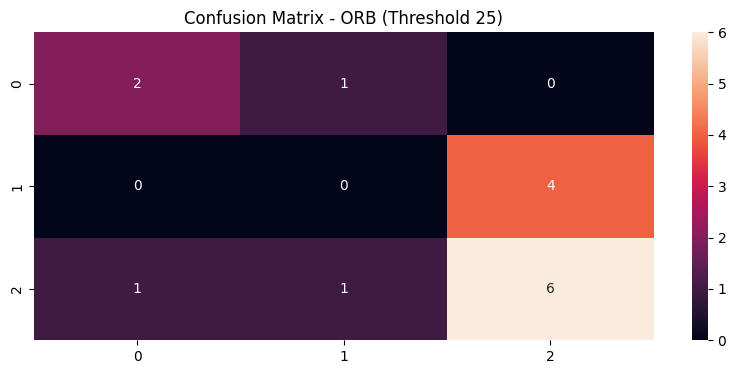

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(conf_matrix_lst_bayesorb[25], annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix - ORB (Threshold 25)')
plt.show()

In [30]:
# comparing there accuracys
combined_dict = {"SIFT":naive_accuracy,"ORB":naive_accuracyorb}
combined_dict
df = pd.DataFrame(combined_dict)
df

,SIFT,ORB
5,20.000000,33.333333
10,60.000000,26.666667
15,66.666667,33.333333
20,40.000000,53.333333
25,73.333333,53.333333


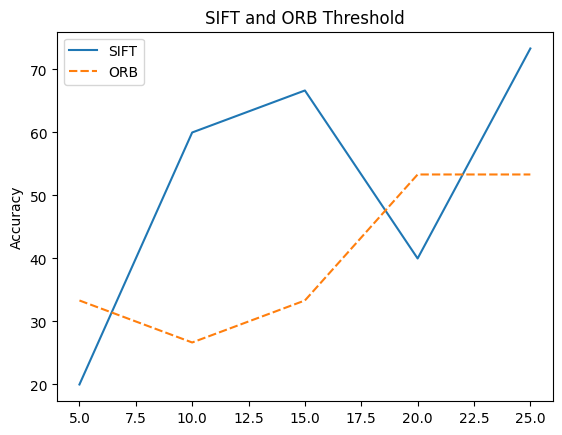

In [31]:
plot = sns.lineplot(data=df)
plot.set_ylabel("Accuracy")
plot.set_title("SIFT and ORB Threshold")
plt.show()